In [13]:
import sys
import numpy as np
import time 
import tracemalloc #measure memory of each task
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import gc

ri_50 = np.random.randint(0,99, size=(50)) # ri = random integer
ri_100 = np.random.randint(0,99, size=(100))
ri_500 = np.random.randint(0,99, size=(500))
ri_1000 = np.random.randint(0,99, size=(1000))
ri_2000 = np.random.randint(0,99, size=(2000))

rf_50 = np.random.uniform(0, 99.9, size=(50)) # rf = random float
rf_100 = np.random.uniform(0, 99.9, size=(100))
rf_500 = np.random.uniform(0, 99.9, size=(500))
rf_1000 = np.random.uniform(0, 99.9, size=(1000))
rf_2000 = np.random.uniform(0, 99.9, size=(2000))

sizes = [50, 100, 500, 1000, 2000]  # Використовуємо фіксований список розмірів



int_arrays = [
    ("50", np.random.randint(0, 100, size=50)),
    ("100", np.random.randint(0, 100, size=100)),
    ("500", np.random.randint(0, 1000, size=500)),
    ("1000", np.random.randint(0, 2000, size=1000)),
    ("2000", np.random.randint(0, 25000, size=2000))
]

float_arrays = [
    ("50", np.random.uniform(0.01, 99.9, size=50)),
    ("100", np.random.uniform(0.01, 199.9, size=100)),
    ("500", np.random.uniform(0.01, 699.9, size=500)),
    ("1000", np.random.uniform(0.01, 1999.9, size=1000)),
    ("2000", np.random.uniform(0.01, 2999.9, size=2000))
]

In [14]:
# Клас для вузла бінарного дерева
class TreeNode:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

# Функція для вставки елемента в бінарне дерево
def insert(root, key):
    if root is None:
        return TreeNode(key)
    else:
        if root.val < key:
            root.right = insert(root.right, key)
        else:
            root.left = insert(root.left, key)
    return root

# Функція для видалення елемента з бінарного дерева
def deleteNode(root, key):
    if root is None:
        return root
    
    if key < root.val:
        root.left = deleteNode(root.left, key)
    elif key > root.val:
        root.right = deleteNode(root.right, key)
    else:
        if root.left is None:
            return root.right
        elif root.right is None:
            return root.left
        temp_val = minValueNode(root.right)
        root.val = temp_val.val
        root.right = deleteNode(root.right, temp_val.val)
    
    return root

# Допоміжна функція для знаходження мінімального значення у дереві
def minValueNode(node):
    current = node
    while(current.left is not None):
        current = current.left
    return current

def build_bst_from_array(arr):
    if len(arr) == 0:
        return None
    root = None
    for value in arr:
        root = insert(root, value)
    return root
# Функція для вимірювання часу вставки та використання пам'яті
def measure_insertion_performance(arrays):
    insertion_times = []
    insertion_memory = []
    for size, array in arrays:
        root = None
        for num in array[:-1]:
            root = insert(root, num)
        
        # Вимірювання часу
        start_time = time.time()
        root = insert(root, array[-1])
        end_time = time.time()
        insertion_times.append(end_time - start_time)
        
        # Вимірювання використання пам'яті
        tracemalloc.start()
        root = insert(root, array[-1])
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        insertion_memory.append(peak)
    
    return insertion_times, insertion_memory

# Вимірювання часу та пам'яті для видалення
def measure_deletion_performance(arrays):
    deletion_times = []
    deletion_memory = []
    for size, array in arrays:
        root = None
        for num in array:
            root = insert(root, num)
        
        # Вимірювання часу
        start_time = time.time()
        root = deleteNode(root, array[-1])
        end_time = time.time()
        deletion_times.append(end_time - start_time)
        
        # Вимірювання використання пам'яті
        tracemalloc.start()
        root = deleteNode(root, array[-1])
        current, peak = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        deletion_memory.append(peak)
    
    return deletion_times, deletion_memory



In [15]:
# Task 1: Insertion into Binary Tree
def task_1(int_arrays, float_arrays):
    insertion_times_int, insertion_memory_int = measure_insertion_performance(int_arrays)
    insertion_times_float, insertion_memory_float = measure_insertion_performance(float_arrays)
    return insertion_times_int, insertion_memory_int, insertion_times_float, insertion_memory_float

# Task 2: Deletion from Binary Tree
def task_2(int_arrays, float_arrays):
    deletion_times_int, deletion_memory_int = measure_deletion_performance(int_arrays)
    deletion_times_float, deletion_memory_float = measure_deletion_performance(float_arrays)
    return deletion_times_int, deletion_memory_int, deletion_times_float, deletion_memory_float


# Функція для вимірювання продуктивності вставки та видалення у V-дерево
def task_3(int_arrays, float_arrays):
    int_execution_times = []
    int_peak_memories = []
    float_execution_times = []
    float_peak_memories = []

    for size, array in int_arrays:
        root = None
        tracemalloc.start()
        start_time = time.time()
        for num in array:
            root = insert(root, num)
        end_time = time.time()
        current_memory, peak_memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        execution_time = end_time - start_time
        int_execution_times.append(execution_time)
        int_peak_memories.append(peak_memory / 1024)

    for size, array in float_arrays:
        root = None
        tracemalloc.start()
        start_time = time.time()
        for num in array:
            root = insert(root, num)
        end_time = time.time()
        current_memory, peak_memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        execution_time = end_time - start_time
        float_execution_times.append(execution_time)
        float_peak_memories.append(peak_memory / 1024)

    return int_execution_times, float_execution_times, int_peak_memories, float_peak_memories

# Функція для вимірювання продуктивності видалення у V-дерево
def task_4(int_arrays, float_arrays):
    int_execution_times = []
    int_peak_memories = []
    for size, array in int_arrays:
        root = build_bst_from_array(array[:-1])
        last_element = array[-1]
        start_time = time.time()
        tracemalloc.start()
        root = deleteNode(root, last_element)
        end_time = time.time()
        execution_time = end_time - start_time
        current_memory, peak_memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        int_execution_times.append(execution_time)
        int_peak_memories.append(peak_memory / 1024)

    float_execution_times = []
    float_peak_memories = []
    for size, array in float_arrays:
        root = build_bst_from_array(array[:-1])
        last_element = array[-1]
        start_time = time.time()
        tracemalloc.start()
        root = deleteNode(root, last_element)
        end_time = time.time()
        execution_time = end_time - start_time
        current_memory, peak_memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        float_execution_times.append(execution_time)
        float_peak_memories.append(peak_memory / 1024)
    
    return int_execution_times, float_execution_times, int_peak_memories, float_peak_memories

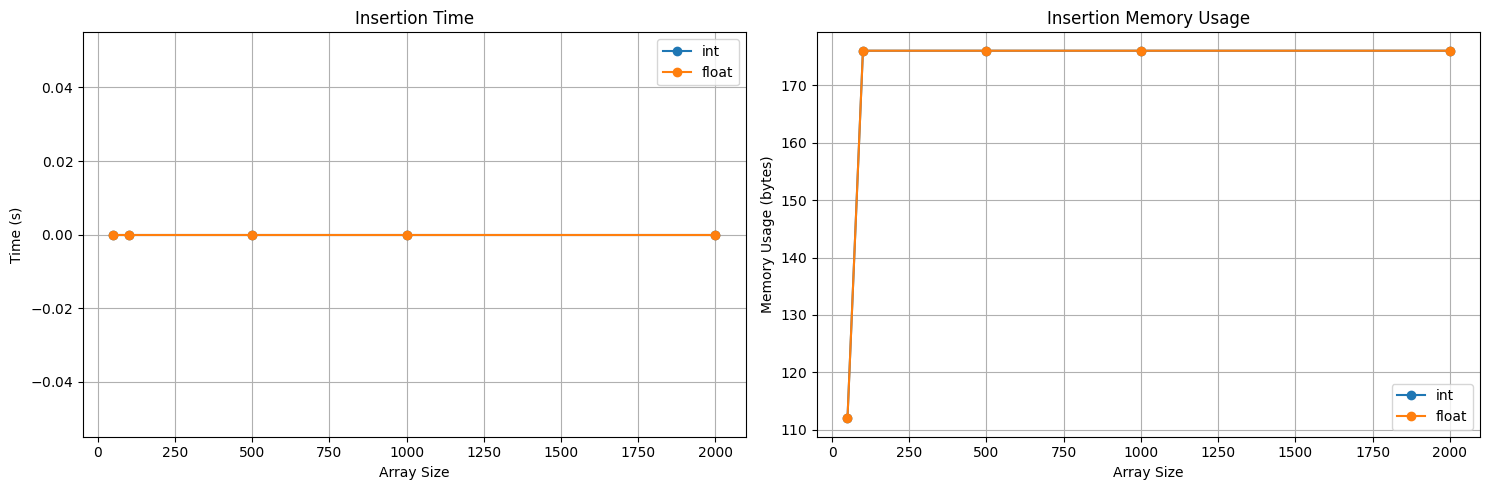

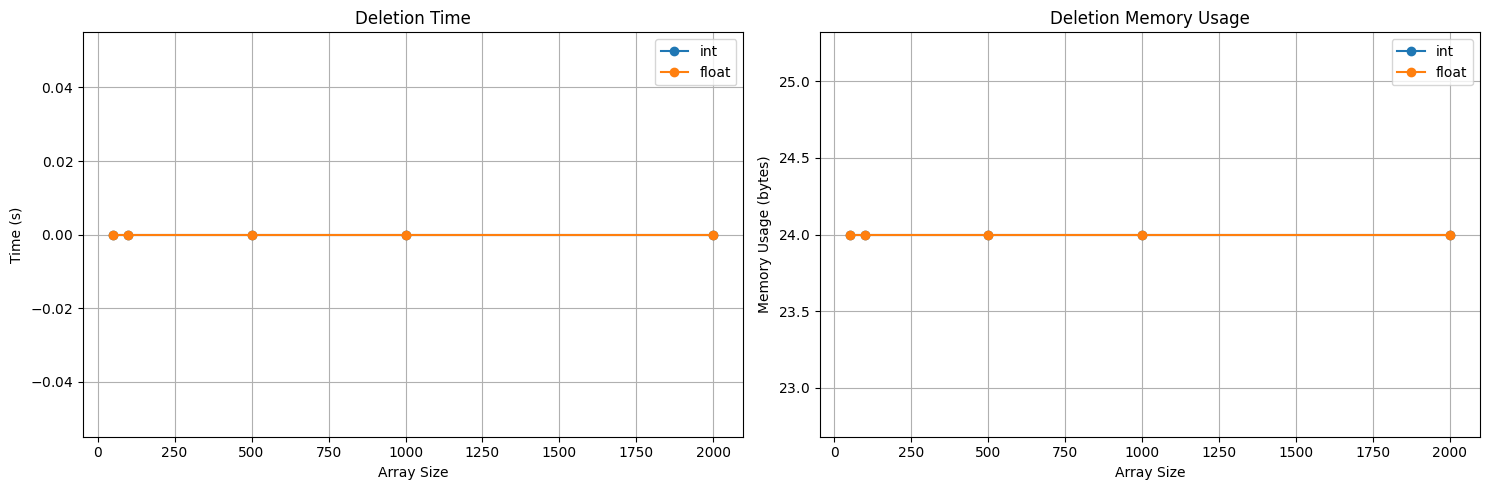

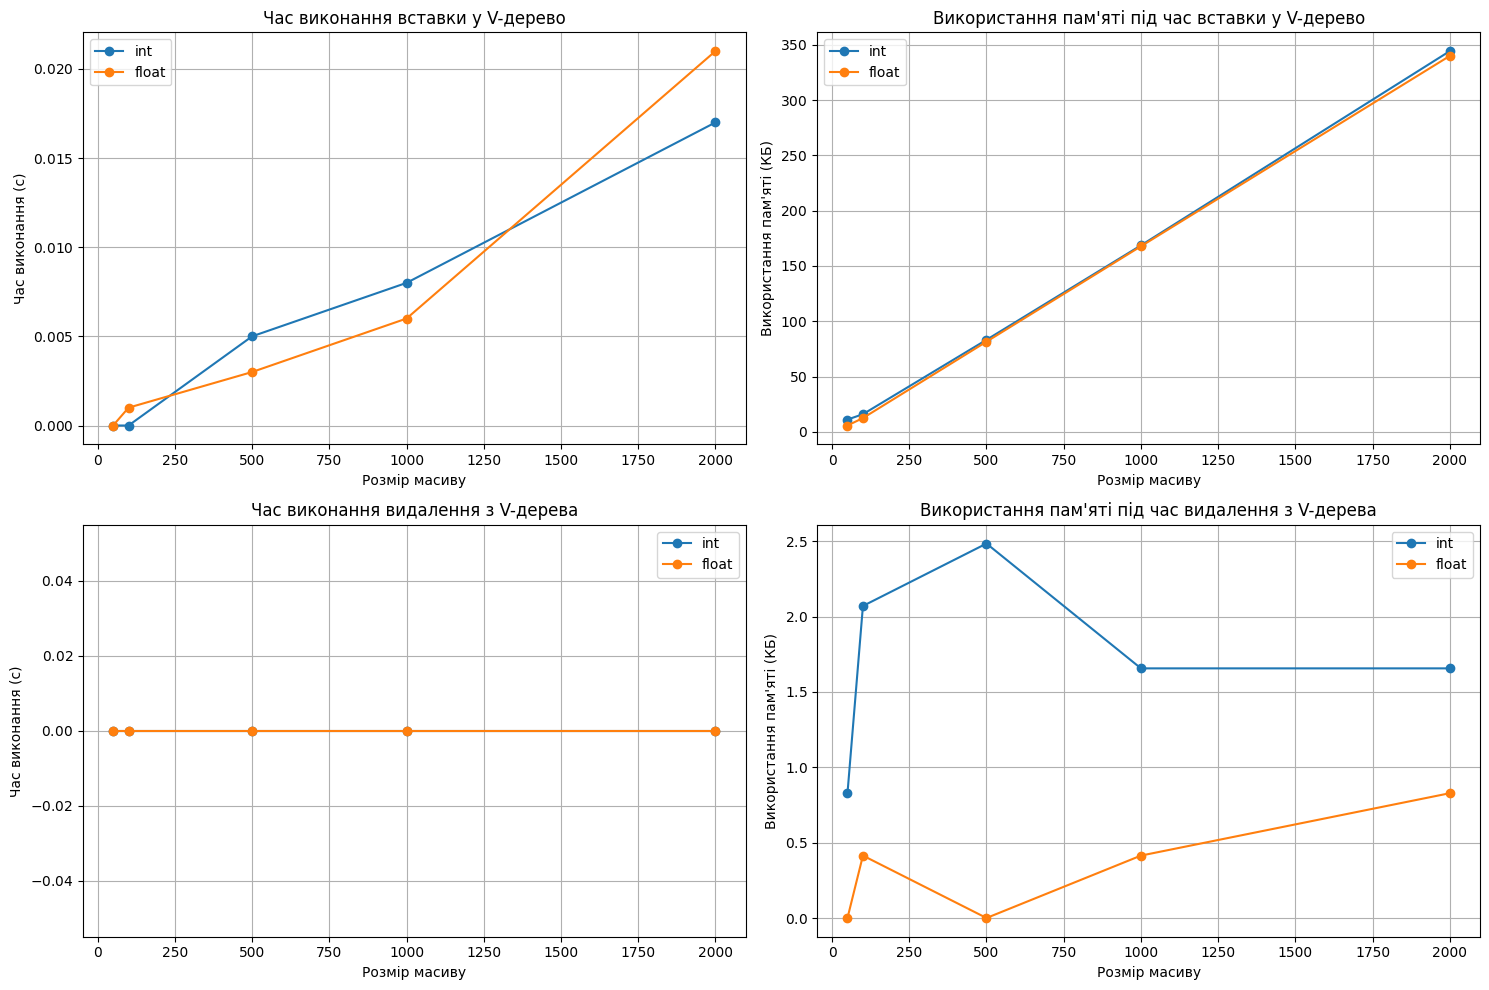

In [17]:
# Графіки для вставки та видалення V-дерева
int_execution_times_3, float_execution_times_3, int_peak_memories_3, float_peak_memories_3 = task_3(int_arrays, float_arrays)
int_execution_times_4, float_execution_times_4, int_peak_memories_4, float_peak_memories_4 = task_4(int_arrays, float_arrays)


def task_1_display(int_arrays, float_arrays):
    # Measure insertion performance for both integer and float arrays
    int_insertion_times, int_insertion_memory = measure_insertion_performance(int_arrays)
    float_insertion_times, float_insertion_memory = measure_insertion_performance(float_arrays)

    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Insertion time plot
    axs[0].plot(sizes, int_insertion_times, marker='o', label='int')
    axs[0].plot(sizes, float_insertion_times, marker='o', label='float')
    axs[0].set_title('Insertion Time')
    axs[0].set_xlabel('Array Size')
    axs[0].set_ylabel('Time (s)')
    axs[0].legend() # додає легенду до першого графіку в рядку зверху у відображенні. Легенда пояснює значення різних ліній або маркерів на графіку.
    axs[0].grid(True) # увімкне сітку для графіків, які розташовані у першому рядку відображення. Графіки в даному випадку можуть бути різних типів, але всі вони будуть мати увімкнуту сітку.
    axs[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True)) # встановлює головний форматер для вісі Y у графіках, які розташовані у першому рядку відображення.

    # Insertion memory plot
    axs[1].plot(sizes, int_insertion_memory, marker='o', label='int')
    axs[1].plot(sizes, float_insertion_memory, marker='o', label='float')
    axs[1].set_title('Insertion Memory Usage')
    axs[1].set_xlabel('Array Size')
    axs[1].set_ylabel('Memory Usage (bytes)')
    axs[1].legend()
    axs[1].grid(True)
    axs[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

    plt.tight_layout()
    plt.show()

# Function to display Task 2 (Deletion from Binary Tree) results
def task_2_display(int_arrays, float_arrays):
    # Measure deletion performance for both integer and float arrays
    int_deletion_times, int_deletion_memory = measure_deletion_performance(int_arrays)
    float_deletion_times, float_deletion_memory = measure_deletion_performance(float_arrays)

    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Deletion time plot
    axs[0].plot(sizes, int_deletion_times, marker='o', label='int')
    axs[0].plot(sizes, float_deletion_times, marker='o', label='float')
    axs[0].set_title('Deletion Time')
    axs[0].set_xlabel('Array Size')
    axs[0].set_ylabel('Time (s)')
    axs[0].legend()
    axs[0].grid(True)
    axs[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

    # Deletion memory plot
    axs[1].plot(sizes, int_deletion_memory, marker='o', label='int')
    axs[1].plot(sizes, float_deletion_memory, marker='o', label='float')
    axs[1].set_title('Deletion Memory Usage')
    axs[1].set_xlabel('Array Size')
    axs[1].set_ylabel('Memory Usage (bytes)')
    axs[1].legend()
    axs[1].grid(True)
    axs[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

    plt.tight_layout()
    plt.show()

# Display Task 1 results
task_1_display(int_arrays, float_arrays)

# Display Task 2 results
task_2_display(int_arrays, float_arrays)

# Графіки для вставки та видалення V-дерева
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Час вставки у V-дерево
axs[0, 0].plot(sizes, int_execution_times_3, marker='o', label='int')
axs[0, 0].plot(sizes, float_execution_times_3, marker='o', label='float')
axs[0, 0].set_title('Час виконання вставки у V-дерево')
axs[0, 0].set_xlabel('Розмір масиву')
axs[0, 0].set_ylabel('Час виконання (с)')
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Пам'ять під час вставки у V-дерево
axs[0, 1].plot(sizes, int_peak_memories_3, marker='o', label='int')
axs[0, 1].plot(sizes, float_peak_memories_3, marker='o', label='float')
axs[0, 1].set_title('Використання пам\'яті під час вставки у V-дерево')
axs[0, 1].set_xlabel('Розмір масиву')
axs[0, 1].set_ylabel('Використання пам\'яті (КБ)')
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[0, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Час видалення з V-дерева
axs[1, 0].plot(sizes, int_execution_times_4, marker='o', label='int')
axs[1, 0].plot(sizes, float_execution_times_4, marker='o', label='float')
axs[1, 0].set_title('Час виконання видалення з V-дерева')
axs[1, 0].set_xlabel('Розмір масиву')
axs[1, 0].set_ylabel('Час виконання (с)')
axs[1, 0].legend()
axs[1, 0].grid(True)
axs[1, 0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Пам'ять під час видалення з V-дерева
axs[1, 1].plot(sizes, int_peak_memories_4, marker='o', label='int')
axs[1, 1].plot(sizes, float_peak_memories_4, marker='o', label='float')
axs[1, 1].set_title('Використання пам\'яті під час видалення з V-дерева')
axs[1, 1].set_xlabel('Розмір масиву')
axs[1, 1].set_ylabel('Використання пам\'яті (КБ)')
axs[1, 1].legend()
axs[1, 1].grid(True)
axs[1, 1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Shows 3 and 4th graphic
plt.tight_layout()
plt.show()